## Polytope Climate-DT Time Series example notebook

This notebook shows how to use earthkit-data and earthkit-plots to pull destination-earth data from LUMI and plot it using earthkit-plots.

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [2]:
%%capture cap
%run ../desp-authentication.py

Exception: Invalid username or password.

This will generate a token that can then be used by earthkit and polytope.

In [3]:
output_1 = cap.stdout.split('}\n')
access_token = output_1[-1][0:-1]

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-plots
* pip install earthkit-regrid  (Optional for spectral variables)
* pip install cf-units         (Optional for unit conversion in maps)

If you do not have eccodes installed please install eccodes using conda as it is a dependency of earthkit, or install earthkit via conda

* conda install eccodes -c conda-forge
* conda install earthkit-data -c conda-forge

In [4]:
import earthkit.data
from earthkit.plots.interactive import Chart
from polytope.api import Client

In [5]:
LOCATION = ((38, -9.5))

In [6]:
client = Client(
    address="polytope.lumi.apps.dte.destination-earth.eu")


request = {
    "activity": "scenariomip",
    "class": "d1",
    "dataset": "climate-dt",
    "experiment": "ssp3-7.0",
    "generation": "1",
    "levtype": "sfc",
    "date": "20200101/to/20210101",
    "model": "ifs-nemo",
    "expver": "0001",
    "param": "167",
    "realization": "1",
    "resolution": "high",
    "stream": "clte",
    "type": "fc",
    "time": "0000/to/2300",
    "feature": {
        "type" : "timeseries",
        "points": [[LOCATION[0], LOCATION[1]]],
        "time_axis": "date",
    }
}

file = client.retrieve("destination-earth", request, "data/climate-dt-earthkit-fe-timeseries.grib") 

2025-06-12 17:35:43 - INFO - Sending request...
{'request': 'activity: scenariomip\n'
            'class: d1\n'
            'dataset: climate-dt\n'
            'date: 20200101/to/20210101\n'
            'experiment: ssp3-7.0\n'
            "expver: '0001'\n"
            'feature:\n'
            '  points:\n'
            '  - - 38\n'
            '    - -9.5\n'
            '  time_axis: date\n'
            '  type: timeseries\n'
            "generation: '1'\n"
            'levtype: sfc\n'
            'model: ifs-nemo\n'
            "param: '167'\n"
            "realization: '1'\n"
            'resolution: high\n'
            'stream: clte\n'
            'time: 0000/to/2300\n'
            'type: fc\n',
 'verb': 'retrieve'}
2025-06-12 17:35:44 - INFO - Request accepted. Please poll ./303d787f-4d73-49e5-b3de-f2670db71557 for status
2025-06-12 17:35:44 - INFO - Checking request status (./303d787f-4d73-49e5-b3de-f2670db71557)...
2025-06-12 17:35:45 - INFO - The current status of the request i

In [ ]:
data = earthkit.data.from_source("file", "data/climate-dt-earthkit-fe-timeseries.grib") 

In [8]:
data._json()

{'type': 'CoverageCollection',
 'domainType': 'PointSeries',
 'coverages': [{'mars:metadata': {'activity': 'scenariomip',
    'class': 'd1',
    'dataset': 'climate-dt',
    'experiment': 'ssp3-7.0',
    'expver': '0001',
    'generation': '1',
    'levtype': 'sfc',
    'model': 'ifs-nemo',
    'realization': '1',
    'resolution': 'high',
    'stream': 'clte',
    'type': 'fc',
    'number': 0,
    'Forecast date': '2021-01-01 00:00:00Z'},
   'type': 'Coverage',
   'domain': {'type': 'Domain',
    'axes': {'x': {'values': [37.968952367503]},
     'y': {'values': [350.5078125]},
     'z': {'values': [0]},
     't': {'values': ['2020-01-01 00:00:00Z',
       '2020-01-01 01:00:00Z',
       '2020-01-01 02:00:00Z',
       '2020-01-01 03:00:00Z',
       '2020-01-01 04:00:00Z',
       '2020-01-01 05:00:00Z',
       '2020-01-01 06:00:00Z',
       '2020-01-01 07:00:00Z',
       '2020-01-01 08:00:00Z',
       '2020-01-01 09:00:00Z',
       '2020-01-01 10:00:00Z',
       '2020-01-01 11:00:00Z',


In [9]:
def location_to_string(location):
    """
    Converts latitude and longitude to a string representation with degrees
    and N/S/E/W.
    """
    (lat, lon) = location
    lat_dir = "N" if lat >= 0 else "S"
    lon_dir = "E" if lon >= 0 else "W"
    return f"{abs(lat):.2f}°{lat_dir}, {abs(lon):.2f}°{lon_dir}"

In [10]:
ds = data.to_xarray()
ds

<xarray.Dataset> Size: 141kB
Dimensions:   (x: 1, y: 1, z: 1, number: 1, datetime: 1, t: 8808)
Coordinates:
  * x         (x) float64 8B 37.97
  * y         (y) float64 8B 350.5
  * z         (z) int64 8B 0
  * number    (number) int64 8B 0
  * datetime  (datetime) <U20 80B '2021-01-01 00:00:00Z'
  * t         (t) datetime64[ns] 70kB 2020-01-01 ... 2021-01-01T23:00:00
Data variables:
    2t        (x, y, z, number, datetime, t) float64 70kB 287.7 287.7 ... 286.5
Attributes: (12/14)
    activity:       scenariomip
    class:          d1
    dataset:        climate-dt
    experiment:     ssp3-7.0
    expver:         0001
    generation:     1
    ...             ...
    realization:    1
    resolution:     high
    stream:         clte
    type:           fc
    number:         0
    Forecast date:  2021-01-01 00:00:00Z

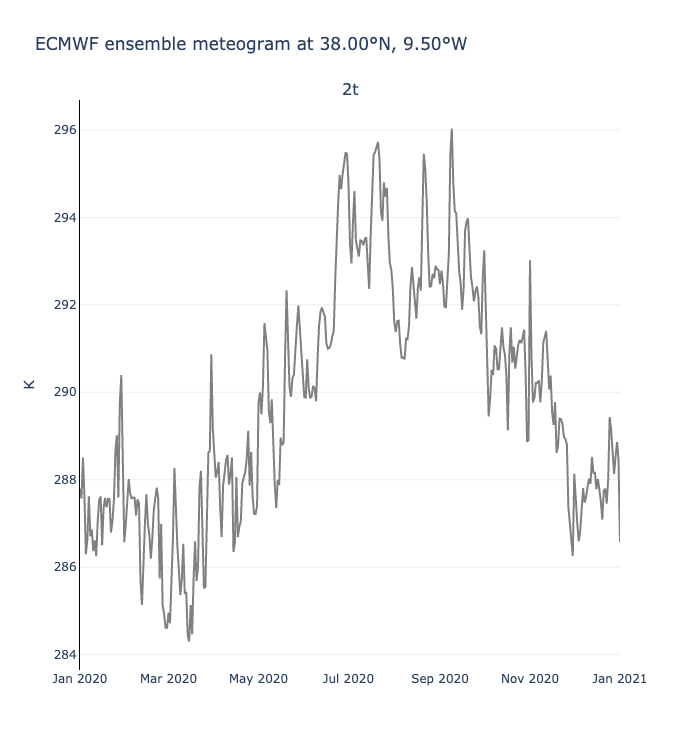

In [19]:
TIME_FREQUENCY = "1d"
QUANTILES = [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1]

chart = Chart()
chart.title(f"ECMWF ensemble meteogram at {location_to_string(LOCATION)}")
#chart.box(ds, time_frequency=TIME_FREQUENCY, quantiles=QUANTILES)
chart.line(ds, line_color='grey', time_frequency=TIME_FREQUENCY)
chart.show("png")  # Replace with chart.show() in an interactive session!